In [1]:
from IPython.display import Image

# [Horizontal discretization](https://www.myroms.org/wiki/Numerical_Solution_Technique#Horizontal_Discretization)

In the horizontal, the ROMS governing equations are discretized over a boundary-fitted, orthogonal curvilinear coordinates (i.e. $(x, y) \rightarrow (\xi, \eta)$) grid. The general formulation of the curvilinear coordinates system allows Cartesian, polar and spherical coordinates applications. The transformation of any of these coordinates to ROMS $(\xi, \eta)$ grid is specified in the metric terms ([pm](https://www.myroms.org/wiki/Variables#pm), [pn](https://www.myroms.org/wiki/Variables#pn)).

The ROMS model takes the Arakawa C-grid. The free-surface $(\zeta)$, density $(\rho)$, and active/passive tracers $(t)$ are located at the center of the cell whereas the horizontal velocity ($u$ and $v$) are located at the west/east and south/north edges of the cell, respectively. That is, the density is evaluated between points where the currents are evaluated

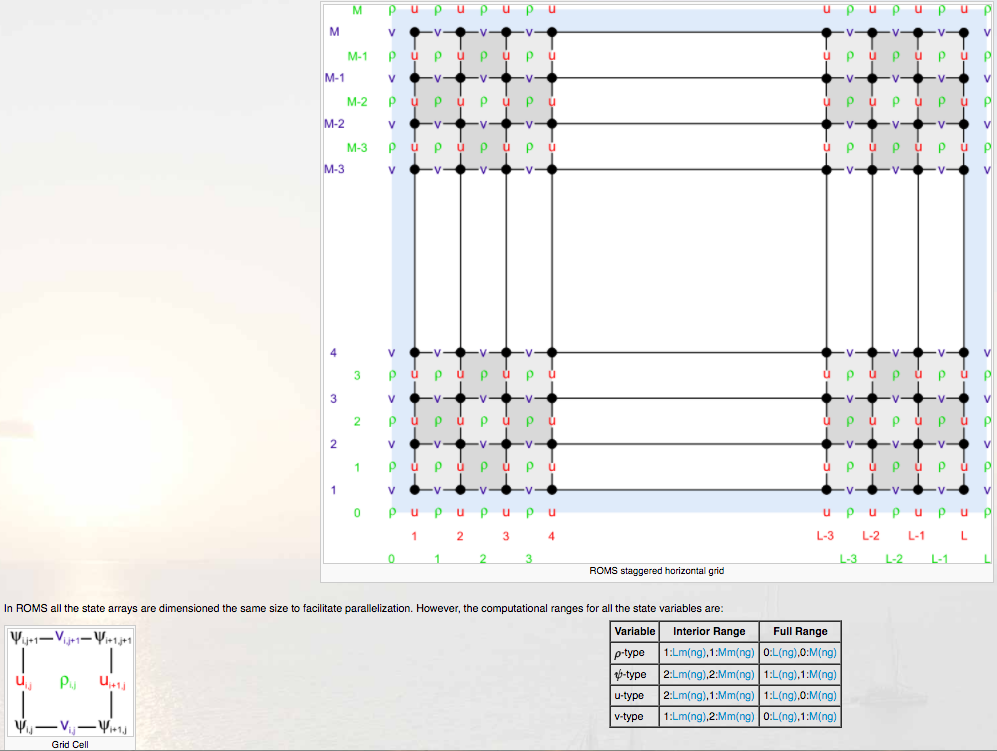

In [9]:
Image('figs/Horizontal_discretization.png', width=800, height=500)

# [Vertical discretization](https://www.myroms.org/wiki/Numerical_Solution_Technique#Vertical_Discretization)

The ROMS governing equations are discretized over variable topography using a stretched, terrain-following, vertical coordinate. As a result, each grid cell may have different $\textbf{level thickness}\ (H_z)$ and volume. The model state variables are vertically staggered so that horizontal momentum $(u, v)$, density $(\rho)$, and active/passive tracers $(t)$ are located at the center of the grid cell. The vertical velocity $(\omega, w)$ and vertical mixing variables $(Akt, Akv,$ etc.$)$ are located at the bottom and top faces of cell. See diagram below.

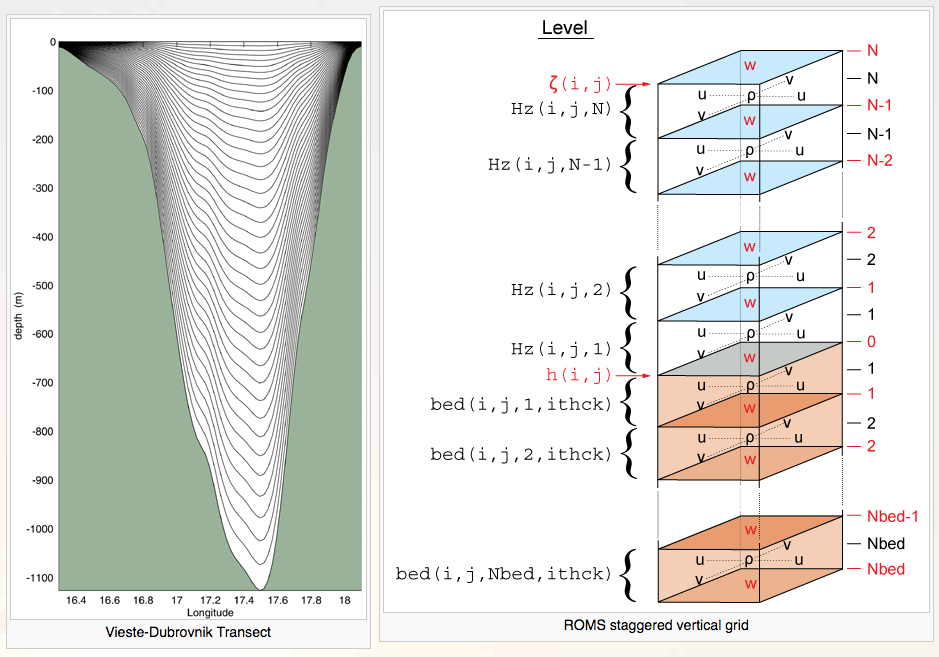

In [8]:
Image('figs/Vertical_discretization.png', width=700, height=500)

# [Conservative Properties](https://www.myroms.org/wiki/Numerical_Solution_Technique#Conservation_Properties)

we have a tracer concentration equation in advective form:

$$\frac{\partial C}{\partial t} + (\boldsymbol{v} \cdot \nabla) C = 0 \ \ \ (1)$$

and also a tracer concentration equation in conservation form:

$$\frac{\partial C}{\partial t} + \nabla \cdot ( \boldsymbol{v} C ) = 0 \ \ \ (2) $$

using the continuity equation:

$$( \nabla \cdot \boldsymbol{v} ) = 0 \ \ \ (3)$$

As a consequence of eq. (1), $\textbf{if the tracer is spatially uniform, it will remain so regardless of the velocity field}$ (constancy preservation). On the other hand, as a consequence of (2), $\textbf{the volume integral of the tracer concentration is conserved in the absence of internal sources and fluxes through the boundary}$. Both properties are valuable and should be retained when constructing numerical ocean models.

The semi-discrete form of the tracer equation is:

$$\frac{\partial}{\partial t} \big( \frac{H_z C}{m n} \big) + \delta_\xi \big( \frac{u \overline{H_z}^\xi \overline{C}^\xi}{\overline{n}^\xi} \big) + \delta_\eta \big( \frac{v \overline{H_z}^\eta \overline{C}^\eta}{\overline{m}^\eta} \big) + \delta_\sigma \big( \overline{C}^\sigma \frac{H_z \Omega}{m n} \big) = \frac{1}{m n} \frac{\partial}{\partial \sigma} \big( \frac{K_m}{\Delta z} \frac{\partial C}{\partial \sigma} \big) + D_C + F_C \ \ \ (4)$$

Here $\delta_\xi, \delta_\eta$ and $\delta_\sigma$ denote simple centered finite-difference approximations to $\frac{\partial}{\partial \xi}, \frac{\partial}{\partial \eta}$ and $\frac{\partial}{\partial \sigma}$ with the differences taken over the distances $\Delta \xi, \Delta \eta$ and $\Delta \sigma$, respectively. $\Delta z$ is the vertical distance from one $\rho$ point to another. $\overline{(\ \ \ )}^\xi, \overline{(\ \ \ )}^\eta$ and $\overline{(\ \ \ )}^\sigma$ represent averages taken over the distances $\Delta \xi, \Delta \eta$ and $\Delta \sigma$.

The finite volume version of the same equation is no different, except that a quantity $C$ is defined as the volume-averaged concentration over the grid box $\Delta V$:

$$C = \frac{m n}{H_z} \int_{\Delta V} \frac{H_z C}{m n} \delta_\xi \delta_\eta \delta_\sigma$$

The quantity $\big( \frac{u \overline{H_z}^\xi \overline{C}^\xi}{\overline{n}^\xi} \big)$ is the flux through an interface between adjacent grid boxes.

The timestep in eq. (4) is assumed to be from time $n$ to time $n + 1$, with the other terms being evaluated at time $n + 1 / 2$ for second-order accuracy. Setting $C$ to $1$ everywhere reduces eq. (4) to:

$$\frac{\partial}{\partial t} \big( \frac{H_z}{m n} \big) + \delta_\xi \big( \frac{u \overline{H_z}^\xi}{\overline{n}^\xi} \big) + \delta_\eta \big( \frac{v \overline{H_z}^\eta}{\overline{m}^\eta} \big) + \delta_\sigma \big( \frac{H_z \Omega}{m n} \big) = 0 \ \ \ (5)$$

If this equation holds true for the step from time $n$ to time $n + 1$, then constancy preservation will hold.

In a hydrostatic model such as ROMS, the discrete continuity equation is needed to compute vertical velocity rather than grid-box volume $\frac{H_z}{m n}$ (the latter is controlled by changes in $\zeta$ in the barotropic mode computations). Here, $\frac{H_z \Omega}{m n}$ is the finite-volume flux across the moving grid-box interface, vertically on the $w$ grid.

The vertical integral of the continuity equation (5), using the vertical boundary conditions on $\Omega$, is:

$$\frac{\partial}{\partial t} \big( \frac{\zeta}{m n} \big) + \delta_\xi \big( \frac{\overline{u} \overline{D}^\xi}{\overline{n}^\xi} \big) + \delta_\eta \big( \frac{\overline{v} \overline{D}^\eta}{\overline{m}^\eta} \big) = 0 \ \ \ (6)$$

where $\zeta$ is the surface elevation, $D = h + \zeta$ is the total depth, and $\overline{u}, \overline{v}$ are the depth-integrated horizontal velocities. This equation and the corresponding 2-D momentum equations are timestepped on a shorter timestep than eq. (4) and the other 3-D equations. Due to the details in the mode coupling, it is only possible to maintain constancy preservation to the accuracy of the barotropic timesteps.

# [Depth-integrated equations](https://www.myroms.org/wiki/Numerical_Solution_Technique#Depth-Integrated_Equations)

The depth average of a quantity $A$ is given by:

$$\overline{A}^\sigma = \frac{1}{D} \int_{−1}^0 H_z\ A\ d \sigma \ \ \ (7)$$

where the overbar indicates a vertically averaged quantity and

$$D \equiv \zeta ( \xi , \eta , t ) + h ( \xi , \eta ) \ \ \ (8)$$

is the total depth of the water column. The vertical integral of the [momentum equations](https://www.myroms.org/wiki/Curvilinear_Coordinates_Transformation) are:

$$\frac{\partial}{\partial t} \big( \frac{D \overline{u}}{m n} \big) + \frac{\partial}{\partial \xi} \big( \frac{D \overline{u u}}{n} \big) + \frac{\partial}{\partial \eta} \big( \frac{D \overline{u v}}{m} \big) − \frac{D f \overline{v}}{m n} − \bigg[ \overline{v v} \frac{\partial}{\partial \xi} \big( \frac{1}{n} \big) − \overline{u v} \frac{\partial}{\partial \eta} \big( \frac{1}{m} \big) \bigg] D = − \frac{D}{n} \big( \frac{\partial \overline{ϕ}_2}{\partial \xi} + g \frac{\partial \zeta}{\partial \xi} \big) + \frac{D}{m n} ( \overline{F}_u + \overline{D}_{h_u} ) + \frac{1}{m n} ( \tau_s^\xi − \tau_b^\xi ) \ \ \ (9)$$ 

and

$$\frac{\partial}{\partial t} \big( \frac{D \overline{v}}{m n} \big) + \frac{\partial}{\partial \xi} \big( \frac{D \overline{u v}}{n} \big) + \frac{\partial}{\partial \eta} \big( \frac{D \overline{v v}}{m} \big) + \frac{D f \overline{u}}{m n} + \bigg[ \overline{u v} \frac{\partial}{\partial \xi} \big( \frac{1}{n} \big) − \overline{u u} \frac{\partial}{\partial \eta} \big( \frac{1}{m} \big) \bigg] D = − \frac{D}{m} \big( \frac{\partial \overline{ϕ}_2}{\partial \eta} + g \frac{\partial \zeta}{\partial \eta} \big) + \frac{D}{m n} ( \overline{F}_v + \overline{D}_{h_v} ) + \frac{1}{m n} ( \tau_s^\eta − \tau_b^\eta ) \ \ \ (10)$$ 

where $\phi_2$ includes the $\frac{\partial z}{\partial \xi}$ term, $\overline{D}_{h_\boldsymbol{u}}$ is the horizontal viscosity, and the vertical viscosity only contributes through the upper and lower boundary conditions. We also need the vertical integral of the continuity equation, shown above as eq. (6).

# [Horizontal and vertical advection](https://www.myroms.org/wiki/Numerical_Solution_Technique#Horizontal_and_Vertical_Advection)

The advection of a tracer $C$ has an equation of the form

$$∂ \frac{\partial}{\partial t} \frac{H_z C}{m n} = - \frac{\partial}{\partial \xi} F^\xi − \frac{\partial}{\partial \eta} F^\eta − \frac{\partial}{\partial \sigma} F^\sigma$$

where we have introduced the advective fluxes:

$$F^\xi = \frac{H_z u C}{n}$$ 
$$F^\eta = \frac{H_z v C}{m}$$ 
$$F^\sigma = \frac{H_z \Omega C}{m n}$$

## Fourth-order centered

The barotropic advection is centered fourth-order unless you specifically pick centered second-order as your horizontal advection scheme. To get fourth-order, create gradient terms:

$$G^\xi = \overline{\big( \frac{\partial C}{\partial \xi} \big)}^\xi$$ 
$$G^\eta = \overline{\big( \frac{\partial C}{\partial \eta} \big)}^\eta$$ 
$$G^\sigma = \overline{\big( \frac{\partial C}{\partial \sigma} \big)}^\sigma$$

The fluxes now become:

$$F^\xi = \frac{\overline{H_z}^\xi}{\overline{n}^\xi} u \big( \overline{C}\xi − \frac{1} {3} \frac{\partial G^\xi}{\partial \xi} \big)$$ 
$$F^\eta = \frac{\overline{H_z}^\eta}{\overline{m}^\eta} v \big( \overline{C}^\eta − \frac{1}{3} \frac{\partial G^\eta}{\partial \eta} \big)$$ 
$$F^\sigma = \frac{\overline{H_z}^\sigma}{m n} \Omega \big( \overline{C}^\sigma − \frac{1}{3} \frac{\partial G^\sigma}{\partial \sigma} \big)$$
